In [1]:
# Load all helper function
%run -i '../util/helper.py'

# Model Loading

In [2]:
dummy_downsampling_model_path        = '../Model/Dummy_downsampling.sav'
dummy_stratified_model_path          = '../Model/Dummy_stratified.sav'
catboost_downsampling_model_path     = '../Model/CatBoost_downsampling.sav'
catboost_stratified_model_path       = '../Model/CatBoost_stratified.sav' 
lightgbm_downsampling_model_path     = '../Model/LightGBM_downsampling.sav'
lightgbm_stratified_model_path       = '../Model/LightGBM_stratified.sav' 
randomforest_downsampling_model_path = '../Model/RandomForest_downsampling.sav'
randomforest_stratified_model_path   = '../Model/RandomForest_stratified.sav' 
svm_downsampling_model_path          = '../Model/SVM_downsampling.sav'
svm_stratified_model_path            = '../Model/SVM_stratified.sav'
xgboost_downsampling_model_path      = '../Model/XGBoost_downsampling.sav'
xgboost_stratified_model_path        = '../Model/XGBoost_stratified.sav'
logistic_downsampling_model_path     = '../Model/logistic_downsampling.sav'
logistic_stratified_model_path       = '../Model/logistic_stratified.sav' 

In [3]:
dummy_downsampling_model        = pickle.load(open(dummy_downsampling_model_path,'rb'))
dummy_stratified_model          = pickle.load(open(dummy_stratified_model_path,'rb'))
catboost_downsampling_model     = pickle.load(open(catboost_downsampling_model_path,'rb'))
catboost_stratified_model       = pickle.load(open(catboost_stratified_model_path,'rb'))
lightgbm_downsampling_model     = pickle.load(open(lightgbm_downsampling_model_path,'rb'))
lightgbm_stratified_model       = pickle.load(open(lightgbm_stratified_model_path,'rb'))
randomforest_downsampling_model = pickle.load(open(randomforest_downsampling_model_path,'rb'))
randomforest_stratified_model   = pickle.load(open(randomforest_stratified_model_path,'rb'))
svm_downsampling_model          = pickle.load(open(svm_downsampling_model_path,'rb'))
svm_stratified_model            = pickle.load(open(svm_stratified_model_path,'rb'))
xgboost_downsampling_model      = pickle.load(open(xgboost_downsampling_model_path,'rb'))
xgboost_stratified_model        = pickle.load(open(xgboost_stratified_model_path,'rb'))
logistic_downsampling_model     = pickle.load(open(logistic_downsampling_model_path,'rb'))
logistic_stratified_model       = pickle.load(open(logistic_stratified_model_path,'rb'))

# Load Data and Data Split (Scaled)

In [4]:
df  = pd.read_csv('../Dataset/brazilian_ecommerce_encoded_scaled.csv')
y = df["is_delayed"]
X = df.drop(["is_delayed"], axis=1, inplace=False)

In [5]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2, stratify=y)

In [6]:
print(X_dev.shape)
print(X_test.shape)

(92506, 29)
(23127, 29)


## Probability Predictions on Test Dataset

In [7]:
logistic_probs_downsampling = logistic_downsampling_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds        = roc_curve(y_test, logistic_probs_downsampling, pos_label = 1)

logistic_probs_stratified   = logistic_stratified_model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1     = roc_curve(y_test, logistic_probs_stratified, pos_label = 1)

dummy_probs_downsampling    = dummy_downsampling_model.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2     = roc_curve(y_test, dummy_probs_downsampling, pos_label = 1)

dummy_probs_stratified      = dummy_stratified_model.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3     = roc_curve(y_test, dummy_probs_stratified, pos_label = 1)

svm_probs_downsampling      = svm_downsampling_model.decision_function(X_test)
fpr4, tpr4, thresholds4     = roc_curve(y_test, svm_probs_downsampling, pos_label = 1)

svm_probs_stratified        = svm_stratified_model.decision_function(X_test)
fpr5, tpr5, thresholds5     = roc_curve(y_test, svm_probs_stratified, pos_label = 1)

## AUC-ROC Comparison

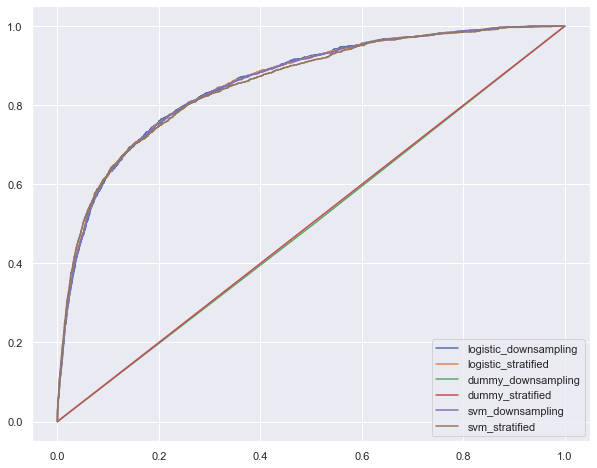

In [8]:
figure(figsize=(10, 8))

plt.plot(fpr,  tpr,  label = 'logistic_downsampling')
plt.plot(fpr1, tpr1, label = 'logistic_stratified')
plt.plot(fpr2, tpr2, label = 'dummy_downsampling')
plt.plot(fpr3, tpr3, label = 'dummy_stratified')
plt.plot(fpr4, tpr4, label = 'svm_downsampling')
plt.plot(fpr5, tpr5, label = 'svm_stratified')
plt.legend()

## Predictions on test

In [9]:
dummy_prediction_downsampling    = dummy_downsampling_model.predict(X_test)
recall, precision                = recall_score(y_test,dummy_prediction_downsampling), precision_score(y_test,dummy_prediction_downsampling)

dummy_prediction_stratified      = dummy_stratified_model.predict(X_test)
recall1, precision1              = recall_score(y_test,dummy_prediction_stratified), precision_score(y_test,dummy_prediction_stratified)

logistic_prediction_downsampling = logistic_downsampling_model.predict(X_test)
recall2, precision2              = recall_score(y_test, logistic_prediction_downsampling), precision_score(y_test, logistic_prediction_downsampling)

logistic_prediction_stratified   = logistic_stratified_model.predict(X_test)
recall3, precision3              = recall_score(y_test, logistic_prediction_stratified), precision_score(y_test, logistic_prediction_stratified)

SVM_prediction_downsampling      = svm_downsampling_model.predict(X_test)
recall4, precision4              = recall_score(y_test,SVM_prediction_downsampling), precision_score(y_test,SVM_prediction_downsampling)

SVM_prediction_stratified        = svm_stratified_model.predict(X_test)
recall5, precision5              = recall_score(y_test,SVM_prediction_stratified), precision_score(y_test,SVM_prediction_stratified)

## Precision Recall Plot

Text(0.5, 0.98, 'Precision Curve comparison')

<Figure size 5600x4800 with 0 Axes>

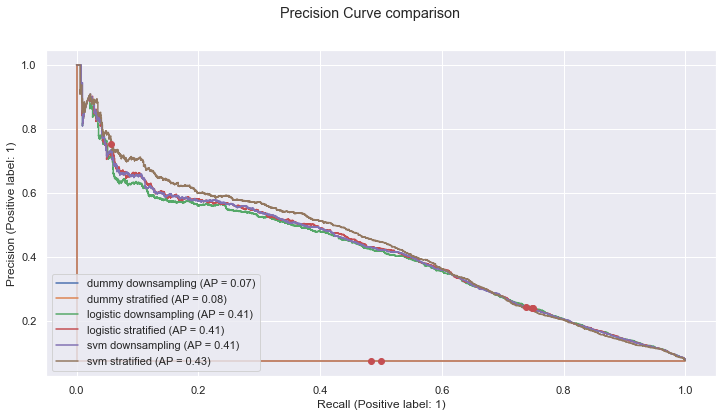

In [10]:
figure(figsize=(14, 12), dpi = 400)

fig = PrecisionRecallDisplay.from_predictions(y_test, dummy_probs_downsampling, name = "dummy downsampling")
fig = PrecisionRecallDisplay.from_predictions(y_test, dummy_probs_stratified, ax = fig.ax_, name = "dummy stratified")
fig = PrecisionRecallDisplay.from_predictions(y_test, logistic_probs_downsampling, ax = fig.ax_, name = "logistic downsampling")
fig = PrecisionRecallDisplay.from_predictions(y_test, logistic_probs_stratified, ax = fig.ax_, name = "logistic stratified")
fig = PrecisionRecallDisplay.from_predictions(y_test, svm_probs_downsampling, ax = fig.ax_, name = "svm downsampling")
fig = PrecisionRecallDisplay.from_predictions(y_test, svm_probs_stratified, ax = fig.ax_, name = "svm stratified")

plt.plot(recall, precision,'ro', label = 'dummy downsampling')
plt.plot(recall1, precision1,'ro', label = 'dummy stratified') 
plt.plot(recall2, precision2,'ro', label = 'logistic downsampling') 
plt.plot(recall3, precision3,'ro', label = 'logistic stratified') 
plt.plot(recall4, precision4,'ro', label = 'svm downsampling')
plt.plot(recall5, precision5,'ro', label = 'svm stratified')
# plt.legend()   

fig.figure_.suptitle("Precision Curve comparison")

# Load Data and Data Split (Stratified)

In [11]:
df = pd.read_csv('../Dataset/brazilian_ecommerce_encoded.csv')
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y = df["is_delayed"]
X = df.drop(["is_delayed", "Unnamed02"], axis=1, inplace=False)

In [12]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2, stratify=y)

In [13]:
print(X_dev.shape)
print(X_test.shape)

(92506, 29)
(23127, 29)


## Probability Predictions on Test Dataset

In [14]:
lightgbm_probs_stratified = lightgbm_stratified_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lightgbm_probs_stratified, pos_label = 1)

lightgbm_probs_downsampling = lightgbm_downsampling_model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, lightgbm_probs_downsampling, pos_label = 1)

random_probs_stratified = randomforest_stratified_model.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, random_probs_stratified, pos_label = 1)

random_probs_downsampling = randomforest_downsampling_model.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, random_probs_downsampling, pos_label = 1)

xgb_probs_stratified = xgboost_stratified_model.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, xgb_probs_stratified, pos_label = 1)

xgb_probs_downsampling = xgboost_stratified_model.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, xgb_probs_downsampling, pos_label = 1)

catboost_probs_stratified = catboost_stratified_model.predict_proba(X_test)[:,1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, catboost_probs_stratified, pos_label = 1)

catboost_probs_downsampling = catboost_downsampling_model.predict_proba(X_test)[:,1]
fpr7, tpr7, thresholds7 = roc_curve(y_test, catboost_probs_downsampling, pos_label = 1)

## AUC-ROC Curve

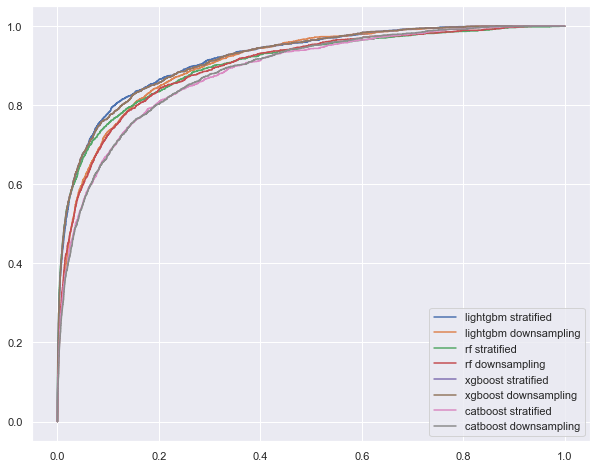

In [15]:
figure(figsize=(10, 8))

plt.plot(fpr,  tpr,  label = 'lightgbm stratified')
plt.plot(fpr1, tpr1, label = 'lightgbm downsampling')
plt.plot(fpr2, tpr2, label = 'rf stratified')
plt.plot(fpr3, tpr3, label = 'rf downsampling')
plt.plot(fpr4, tpr4, label = 'xgboost stratified')
plt.plot(fpr5, tpr5, label = 'xgboost downsampling')
plt.plot(fpr6, tpr6, label = 'catboost stratified')
plt.plot(fpr7, tpr7, label = 'catboost downsampling')
plt.legend()

## Predictions on Test

In [16]:
randomforest_prediction_stratified = randomforest_stratified_model.predict(X_test)
recall, precision = recall_score(y_test, randomforest_prediction_stratified), precision_score(y_test, randomforest_prediction_stratified)

randomforest_prediction_downsampling = randomforest_downsampling_model.predict(X_test)
recall1, precision1 = recall_score(y_test, randomforest_prediction_downsampling), precision_score(y_test, randomforest_prediction_downsampling)

LGB_prediction_stratified = lightgbm_stratified_model.predict(X_test)
recall2, precision2 = recall_score(y_test,LGB_prediction_stratified), precision_score(y_test,LGB_prediction_stratified)

LGB_prediction_downsampling = lightgbm_downsampling_model.predict(X_test)
recall3, precision3 = recall_score(y_test,LGB_prediction_downsampling), precision_score(y_test,LGB_prediction_downsampling)

CB_prediction_stratified = np.array([str2bool(p) for p in catboost_stratified_model.predict(X_test)])
recall4, precision4 = recall_score(y_test,CB_prediction_stratified), precision_score(y_test,CB_prediction_stratified)

CB_prediction_downsampling = np.array([str2bool(p) for p in catboost_downsampling_model.predict(X_test)])
recall5, precision5 = recall_score(y_test,CB_prediction_downsampling), precision_score(y_test,CB_prediction_downsampling)

XGB_prediction_stratified = xgboost_stratified_model.predict(X_test)
recall6, precision6 = recall_score(y_test,XGB_prediction_stratified), precision_score(y_test,XGB_prediction_stratified)

XGB_prediction_downsampling = xgboost_downsampling_model.predict(X_test)
recall7, precision7 = recall_score(y_test,XGB_prediction_downsampling), precision_score(y_test,XGB_prediction_downsampling)

## Precision-Recall Plot

Text(0.5, 0.98, 'Precision Curve comparison')

<Figure size 5600x4800 with 0 Axes>

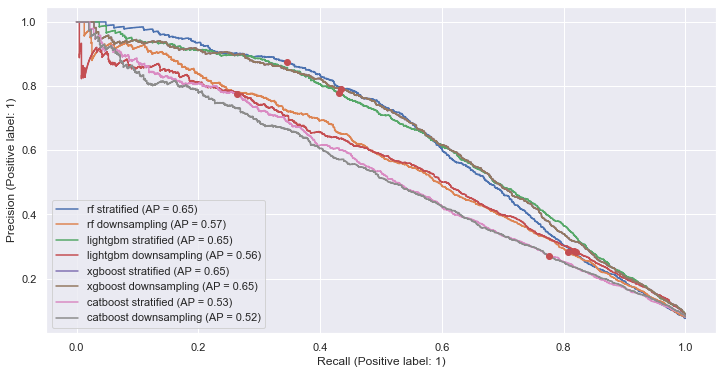

In [17]:
figure(figsize=(14, 12), dpi = 400)

fig1 = PrecisionRecallDisplay.from_predictions(y_test, random_probs_stratified, name = "rf stratified")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, random_probs_downsampling, ax = fig1.ax_, name = "rf downsampling")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, lightgbm_probs_stratified, ax = fig1.ax_, name = "lightgbm stratified")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, lightgbm_probs_downsampling, ax = fig1.ax_, name = "lightgbm downsampling")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, xgb_probs_stratified, ax = fig1.ax_, name = "xgboost stratified")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, xgb_probs_downsampling, ax = fig1.ax_, name = "xgboost downsampling")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, catboost_probs_stratified, ax = fig1.ax_, name = "catboost stratified")
fig1 = PrecisionRecallDisplay.from_predictions(y_test, catboost_probs_downsampling, ax = fig1.ax_, name = "catboost downsampling")

plt.plot(recall, precision,'ro', label = 'rf stratified')
plt.plot(recall1, precision1,'ro', label = 'rf downsampling') 
plt.plot(recall2, precision2,'ro', label = 'lightgbm stratified') 
plt.plot(recall3, precision3,'ro', label = 'lightgbm downsampling') 
plt.plot(recall4, precision4,'ro', label = 'xgboost stratified')
plt.plot(recall5, precision5,'ro', label = 'xgboost downsampling')
plt.plot(recall6, precision6,'ro', label = 'catboost stratified')
plt.plot(recall7, precision7,'ro', label = 'catboost downsampling')   

fig.figure_.suptitle("Precision Curve comparison") 

$$
\begin{aligned}
& \text {Table showing F-1 and AUROC values }\\
&\begin{array}{cccc}
\hline \hline \text { Models } & \text { F-1 Score } & \text { Area under ROC curve } \\
\hline Dummy \;(downsampling) & 0.1297 & XXX \\
Dummy \; (stratified) & 0.1279 &  XXX \\
Catboost \;(downsampling) & 0.4003 & XXX \\
Catboost \;(stratified) & 0.3933 & XXX \\
Lightgbm \;(downsampling) & 0.4246 & XXX \\
Lightgbm \;(stratified) & 0.5548 & XXXX \\
Random \; Forest \;(downsampling) & 0.4206 & 0.8978 \\
Random \; Forest \;(stratified) & 0.4950 & 0.9045 \\
SVM \;(downsampling) & 0.3676 & XXX \\
SVM \;(stratified) & 0.1066 & XXX \\
XGBoost \;(downsampling) & 0.4223 & XXX \\
XGBoost \;(stratified) & 0.5610 & XXXX \\
Logistic \; Regression \;(downsampling) & 0.3626 & 0.8569  \\
Logistic \; Regression \;(stratified) & 0.3642 & 0.8569 \\
\hline
\end{array}
\end{aligned}
$$